In [1]:
import numpy as np # numerical calclations
import xarray as xr # read netcdf files
import matplotlib.pyplot as plt # plotting

In [2]:
file='/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/tas_Amon_CCSM4_rcp45_r1i1p1_210101-229912.nc'

In [3]:
ds=xr.open_dataset(file)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 2388)
Coordinates:
  * time       (time) object 2101-01-16 12:00:00 ... 2299-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG SS Ds SA BC MD OC Oz AA
    parent_experiment_id:         historical
    parent_experiment_rip:        r1i1p1
    branch_time:                  21.0
 

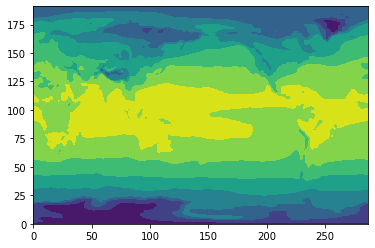

In [11]:
plt.contourf(ds['tas'][10,:,:])

In [12]:
url='https://psl.noaa.gov/thredds/dodsC/Datasets/cpcsoil/soilw.mon.mean.v2.nc'

In [13]:
soilw_ds=xr.open_dataset(url)

In [14]:
soilw_ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 872)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-08-01
Data variables:
    soilw    (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           CPC Soil Moisture
    institution:                     NOAA/ESRL PSD
    dataset_title:                   CPC Soil Moisture
    history:                         Wed Oct 18 15:13:37 2017: ncks -d time,,...
    NCO:                             4.6.9
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    DODS_EXTRA.Unlimited_Dimension:  time

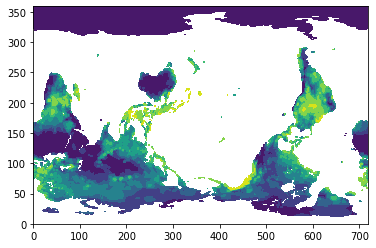

In [15]:
plt.contourf(soilw_ds['soilw'][0,:,:])

In [18]:
grbfile='/shared/working/rean/era-interim/daily/data/2010/ei.oper.an.pl.regn128cm.2010010600'
grb_ds=xr.open_dataset(grbfile,engine='cfgrib',backend_kwargs={'indexpath':''})

In [19]:
grb_ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 256, longitude: 512)
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] ...
Data variables:
    pv             (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    vo             (isobaricInhPa, latitude, longitude) float32 ...
    d              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isoba

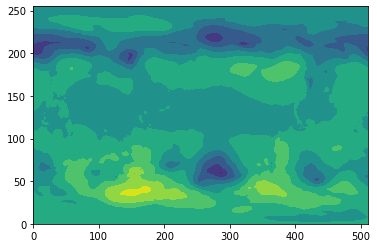

In [20]:
plt.contourf(grb_ds['z'][0,:,:])

In [21]:
path='/shared/cmip5/data/rcp45/atmos/mon/Amon/ts/NCAR.CCSM4/r*i1p1/'
fname='ts_Amon_CCSM4_rcp45_r*i1p1_200601-210012.nc'
mf_ds=xr.open_mfdataset(path+fname,concat_dim='ensemble',combine='nested',decode_times=True)

In [22]:
mf_ds

<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 6, lat: 382, lon: 288, time: 1140)
Coordinates:
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -89.06 -88.12 ... 89.06 89.06 90.0
Dimensions without coordinates: bnds, ensemble
Data variables:
    time_bnds  (ensemble, time, bnds) object dask.array<chunksize=(1, 1140, 2), meta=np.ndarray>
    lat_bnds   (ensemble, lat, bnds) float64 dask.array<chunksize=(1, 382, 2), meta=np.ndarray>
    lon_bnds   (ensemble, lon, bnds) float64 dask.array<chunksize=(1, 288, 2), meta=np.ndarray>
    ts         (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 1140, 382, 288), meta=np.ndarray>
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM